<a href="https://colab.research.google.com/github/emad-askari/emad-askari/blob/main/Genetic_Algorithm_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


$\Large{GA}$ - $Genetic\ Algorithm$

---

```python
def GA(cost_func, popN, genN, cost_threshold, LB, UB, aristocratN, adventurerN):
  ...
  return pop, cost, num_gen
```


$\underline{\large{Inputs;}}\\
- cost\underline\ func=the\ function\ that\ we\ want\ to\ minimize\\
- popN=population\ in\ each\ generation\\
- genN=maximum\ number\ of\ generations\\
- cost\underline\ threshold=the\ generation\ stops\ when\ the\ variation\ of\ the\ lowest\ cost\ drops\ below\ this\ value\\
- LB=lower\ bound\ (of\ exploration)\\
- UB=upper\ bound\ (of\ exploration)\\
- aristocratN=number\ of\ individuals\ that\ are\ chosen\ to\ be\ taken\ to\ the\ next\ generation\ without\ any\ changes \\
- adventurerN= number\ of\ individuals\ generated\ randomly\ within\ the\ bounds\ to\ explore\ other\ possible\ answers$

$\underline{\large{Outpus;}}\\
- pop=matrix\ of\ populations\ \small(row=population,\ column=generations)\\
- cost=cost\ of\ each\ individual\ in\ each\ generation\\
- num\underline\ gen=number\ of\ generations\\
$

In [30]:
def GA(cost_func, popN, genN, cost_threshold, LB, UB, aristocratN, adventurerN):
  import numpy as np
  import matplotlib.pyplot as plt

  childrenN  = popN - aristocratN - adventurerN

  pop  = np.random.uniform(LB, UB, popN)
  cost = cost_func(pop)
  sort_indx   = np.argsort(cost)

  pop  =  pop[sort_indx].reshape(popN, 1)
  cost = cost[sort_indx].reshape(popN, 1)

  flag = 0
  for i in range(1, genN):

    aristocrat = pop[0:aristocratN, i-1]

    children = np.zeros(childrenN)
    for j in range(childrenN):
      children[j] = (pop[j, i-1] + pop[j+1, i-1])/2

    adventurer = np.random.uniform(LB, UB, adventurerN)

    next_pop = np.append(aristocrat, children)
    next_pop = np.append(next_pop, adventurer)
    next_cost = cost_func(next_pop)
    sort_indx = np.argsort(next_cost)

    pop  =  np.append( pop,  next_pop[sort_indx].reshape(popN, 1), axis=1)
    cost =  np.append(cost, next_cost[sort_indx].reshape(popN, 1), axis=1)
    
    if i>10 and cost_threshold > np.var(cost[0,-11:-1]):
      flag = 1
      break
    
  print('optimum value \t = \t' + str(np.round(pop[0,-1],2)))
  print('optimum cost \t = \t' + str(np.round(cost[0,-1],2)))
  print('number of generations = ' + str(i+1))
  if flag == 1: print('variation of the lowest cost dropped below the threshold ('+ str(cost_threshold) +')')
  elif flag == 0: print('number of generations exceeded the given value ('+ str(genN) +')')


  return pop, cost


optimum value 	 = 	4.34
optimum cost 	 = 	-7.94
number of generations = 23
variation of the lowest cost dropped below the threshold (0.01)


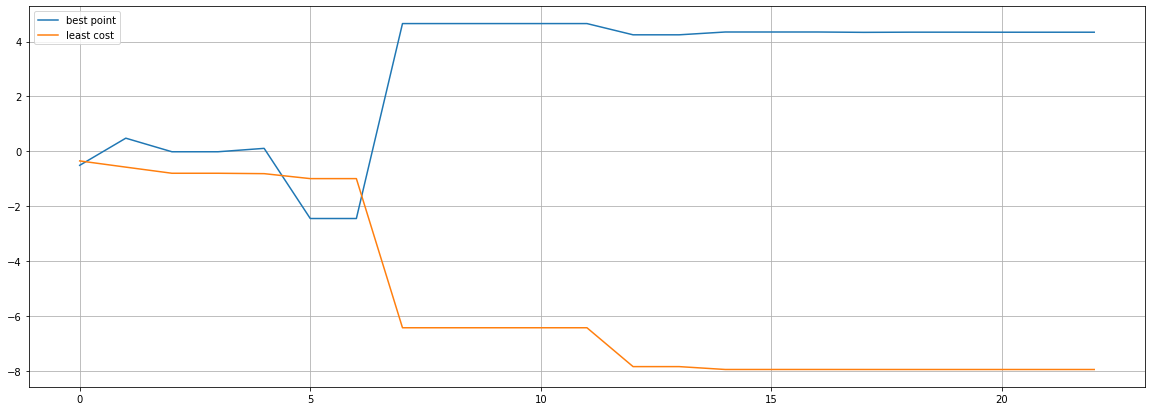

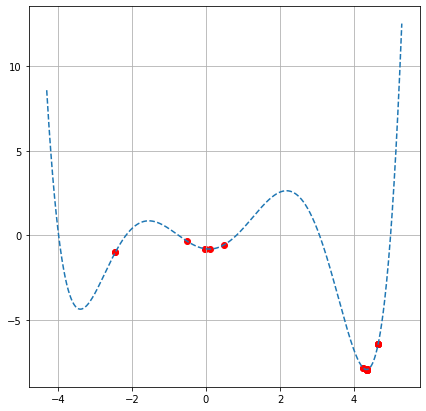

In [38]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-4.3, 5.3, 0.01)
fn = lambda x: (x**6 - 2*x**5 - 26*x**4 + 28*x**3 + 145*x**2 - 26*x - 80) /100
popN = 3
iter = 1000
pop_threshold  = 0.1
cost_threshold = 0.01
LB = -5
UB = +6
aristocratN =  1
adventurerN =  1

pop, cost = GA(fn, popN, iter, cost_threshold, LB, UB, aristocratN, adventurerN)


plt.figure(2, [20,7])
plt.plot(pop[0,:], label='best point')
plt.plot(cost[0,:], label='least cost')
plt.legend()
plt.grid('on')

plt.figure(1, [7,7])
plt.plot(t, fn(t), '--')
plt.scatter(pop[0,:], cost[0,:], linewidth=1, color='r')
plt.grid('on')

